In [4]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np 
cmap = sns.cm.rocket_r
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [6]:
from collections import defaultdict
people = {}

for i,person in enumerate(G.nodes()):
    people[i] = defaultdict(int)
    people[i]['age'] = G.nodes[person]['age']
    for n in G[person]:
        people[i][G.nodes[n]['age']] += 1


In [7]:
bins = list(range(0,70,5)) + [105]
labels = list(range(0,70,5))

In [8]:
def make_heatmap(people_dict, title, filename):
    df = pd.DataFrame.from_dict(people_dict).T.fillna(0)
    df = df.sort_values(by='age').reset_index(drop=True)
    df['age'] = pd.cut(df.age, bins=bins, labels=labels)
    df = df.set_index(df.age).drop('age', axis=1)
    df.columns = pd.cut(df.columns.to_list(), bins=bins, labels=labels)
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby('age').mean()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1).T
    df.rename(columns = {df.columns[-1]: str(df.columns[-1]) + '+'}, inplace=True)
    df.rename(index = {df.index[0]: str(df.index[0]) + '+'}, inplace=True)
    sns.heatmap(df, annot=False, vmin=0, vmax=10, cmap=cmap)
    plt.title(title, fontsize=18)
    plt.ylabel('Age of Contact', fontsize=16)
    plt.xlabel('Age of Person', fontsize=16)
    plt.savefig(f'{filename}.pdf')

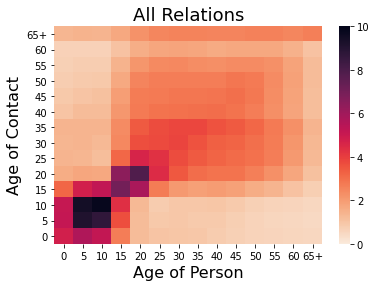

In [10]:
make_heatmap(people, 'All Relations', 'heatmap_no_restriction')

In [11]:
people_no_schools = {}

for i,person in enumerate(G.nodes()):
    people_no_schools[i] = defaultdict(int)
    people_no_schools[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school':
            people_no_schools[i][G.nodes[y]['age']] += 1

In [12]:
np.unique([z['edge_type'] for x,y,z in G.edges(data=True)])

array(['home', 'neighbor', 'school', 'work'], dtype='<U8')

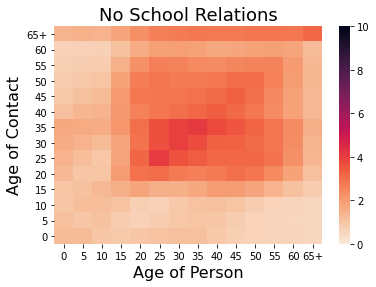

In [13]:
make_heatmap(people_no_schools, 'No School Relations', 'heatmap_no_schools')

In [14]:
people_no_work = {}

for i,person in enumerate(G.nodes()):
    people_no_work[i] = defaultdict(int)
    people_no_work[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'work':
            people_no_work[i][G.nodes[y]['age']] += 1

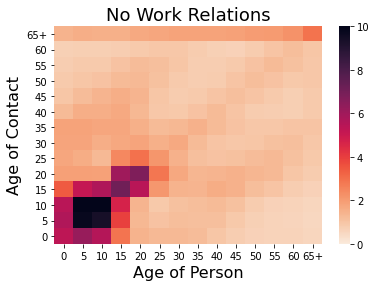

In [15]:
make_heatmap(people_no_work, 'No Work Relations', 'heatmap_no_work')

In [ ]:
for z in range(1,340):
    l = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == z]
    print(len(l))

In [ ]:
edges = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == 1]
s = nx.MultiGraph(edges)

In [ ]:
s.nodes()

In [ ]:
nx.write_gml(nx.relabel_nodes(s, lambda x: str(x)), 'subgraph_work.gml')


In [ ]:
import json
with open('work_subgraph.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(nx.relabel_nodes(s, lambda x: str(x)))))


In [ ]:
nx.draw(nx.relabel_nodes(s, lambda x: str(x)), node_size=15)